## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Ho - There is no difference in network latency since we switched internet service providers

Ha - There is a difference in network latency since we switched internet service providers

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- There is no difference in network latency, but we said there was.
type 2 error- There is a difference in network latency, but we said there wasn't.

### Is the website redesign any good?

Ho - We are not getting more click throughs (website traffic) after the redesign than before

Ha - We are getting more click throughs (website traffic) after the redesign than before

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- There is no increase in web traffic, but we thought there was.
type 2 error- There is an increase in web traffic, but we said there wasn't.

### Is our television ad driving more sales?

Ho - We are not seeing an increase in sales within 24 hours after our TV ad airs during an episode of Walker Texas Ranger than if our ad does not air during an episode of Walker Texas Ranger.

Ha - We are seeing an increase in sales within 24 hours after our TV ad airs during an episode of Walker Texas Ranger than if our ad does not air during an episode of Walker Texas Ranger.

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- We claim with confidence that there is an increase in sales within 24 hours after our ad airs when there is indeed no increase. It may have been the weather... We falsly rejected the Ho.
type 2 error- There was an increase in sales, but we chose to accept the Ho and thought there was no increase. We falsly did not reject our Ho.

## Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of 
students on the second floor compared to grades of all students?

Type of test- one tail t-test

Are adults who drink milk taller than adults who dont drink milk?

Type of test- two tail t-test (independent t-test)

Is the the price of gas higher in texas or in new mexico?

Type of test- two tail t-test (independent t-test)

Are there differences in stress levels between students who take data science vs 
students who take web development vs students who take cloud academy?

Type of test- ANOVA

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
np.random.seed(8675309)

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [97]:
#Ho - there is no difference
#Ha - there is a difference
alpha = .05

In [98]:
office_a = np.random.normal(90, 15, 40)
office_b = np.random.normal(100, 20, 50)


In [99]:
office_a.var()

145.6766034205988

In [100]:
office_b.var()

285.9021551305127

In [101]:
t, p = stats.ttest_ind(office_a, office_b, equal_var = False)
print(t, p)

-3.128226866077665 0.0023926267265584737


In [91]:
if p < alpha:
    print('There is a difference in the time it takes to sell homes between the offices!')
else:
    print('There is no difference in the time it takes to sell homes!')

There is a difference in the time it takes to sell homes between the offices!


In [32]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [39]:
mpg['fuel_efficiency'] = (mpg.cty+mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [41]:
#Ho - there is no difference
#Ha - there is a difference

y2008 = mpg[mpg['year']==2008].fuel_efficiency
y1999 = mpg[mpg['year']==1999].fuel_efficiency

<AxesSubplot:>

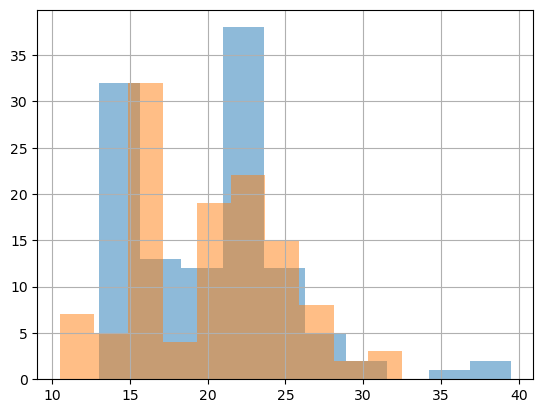

In [44]:
y1999.hist(alpha=.5)
y2008.hist(alpha=.5)

In [45]:
print(y1999.var())
print(y2008.var())

27.122605363984682
24.097480106100797


In [49]:
s, p = stats.ttest_ind(y1999, y2008, equal_var=False)

if p < alpha:
    print(f'there is a significant difference (pvalue: {p}')
else:
    print(f'there is not a significant difference (pvalue: {p})')

there is not a significant difference (pvalue: 0.8263750772060638)


## Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

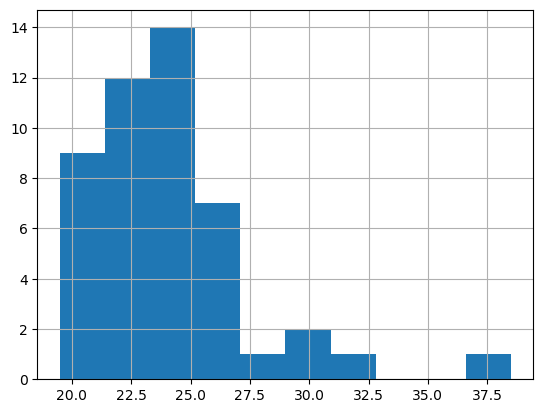

In [51]:
compact = mpg[mpg['class']=='compact'].fuel_efficiency
compact.hist()

In [53]:
compact.value_counts().sum()

47

In [103]:
overall_mean = mpg['fuel_efficiency'].mean()

t, p = stats.ttest_1samp(compact, overall_mean)

if p/2 < alpha:
    print(f'there is a significant difference (pvalue: {p/2}')
else:
    print(f'there is not a significant difference (pvalue: {p/2})')

there is a significant difference (pvalue: 2.0992818971585743e-10


## Do manual cars get better gas mileage than automatic cars?

In [79]:
automatic = mpg[mpg['trans'].str.startswith('auto')]
automatic.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [77]:
manual = mpg[mpg['trans'].str.startswith('manual')]
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


<AxesSubplot:>

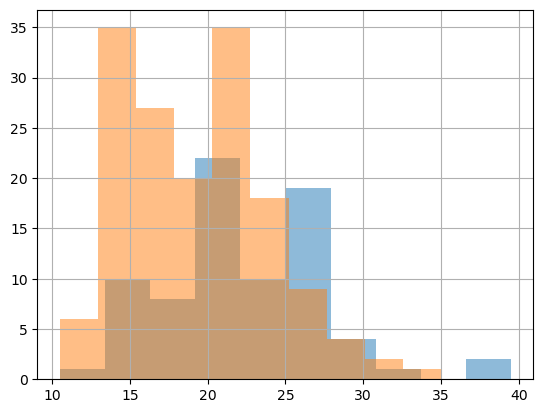

In [84]:
manual['fuel_efficiency'].hist(alpha=.5)
automatic['fuel_efficiency'].hist(alpha=.5)

In [86]:
t, p = stats.ttest_ind(automatic['fuel_efficiency'], manual['fuel_efficiency'], equal_var=False)

if p < alpha:
    print(f'there is a significant difference (pvalue: {p}')
else:
    print(f'there is not a significant difference (pvalue: {p})')

there is a significant difference (pvalue: 1.7952248999917893e-05
